# Project Proposal: Group 34

In [46]:
#Load necessary packages for the project proposal
library(tidyverse)
library(repr)
library(infer)

In [47]:
#Load data into R frame, note that the dataset below only applies to math course
student_data_original <- read_delim(file = "https://raw.githubusercontent.com/czhang176/dsci100_groupproject/main/student-mat.csv",
                           delim = ";") 

#filter out columns other than G1, G2, G3, and schoolsup, then filter out the NA rows if applicable, also add in final_grade_by_percent to
#represent students overall performance on the course
student_data_clean <- student_data_original %>%
                      select(G1, G2, G3, schoolsup) %>%
                      filter(G1 != is.na(G1) & G2 != is.na(G2) & G3 != is.na(G3) & schoolsup != is.na(schoolsup)) %>%
                      mutate(final_grade_by_percent = (G1 + G2 + G3) / 60 * 100) %>%
                      rename(Period_1_Grade = G1, Period_2_Grade = G2, Period_3_Grade = G3, extra_edu_support = schoolsup)

student_data_clean

Rows: 395 Columns: 33

── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Period_1_Grade,Period_2_Grade,Period_3_Grade,extra_edu_support,final_grade_by_percent
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
5,6,6,yes,28.33333
5,5,6,no,26.66667
7,8,10,yes,41.66667
15,14,15,no,73.33333
6,10,10,no,43.33333
15,15,15,no,75.00000
12,12,11,no,58.33333
6,5,6,yes,28.33333
16,18,19,no,88.33333


## Sampling & Visualization
since the data obtained is not huge, we will take the entire data as a sample to perform bootstrapping and confidence interval

samples,mean,median,standard_deviation
<chr>,<dbl>,<dbl>,<dbl>
students_with_support,47.20000,45.83333,11.11902
students_without_support,57.96667,57.96667,16.74231


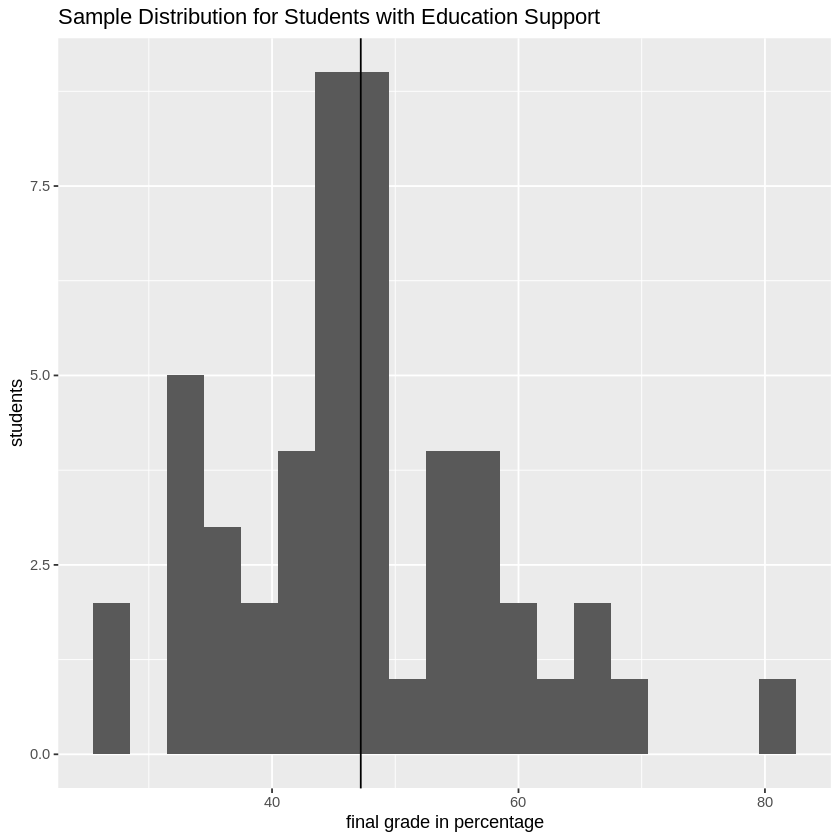

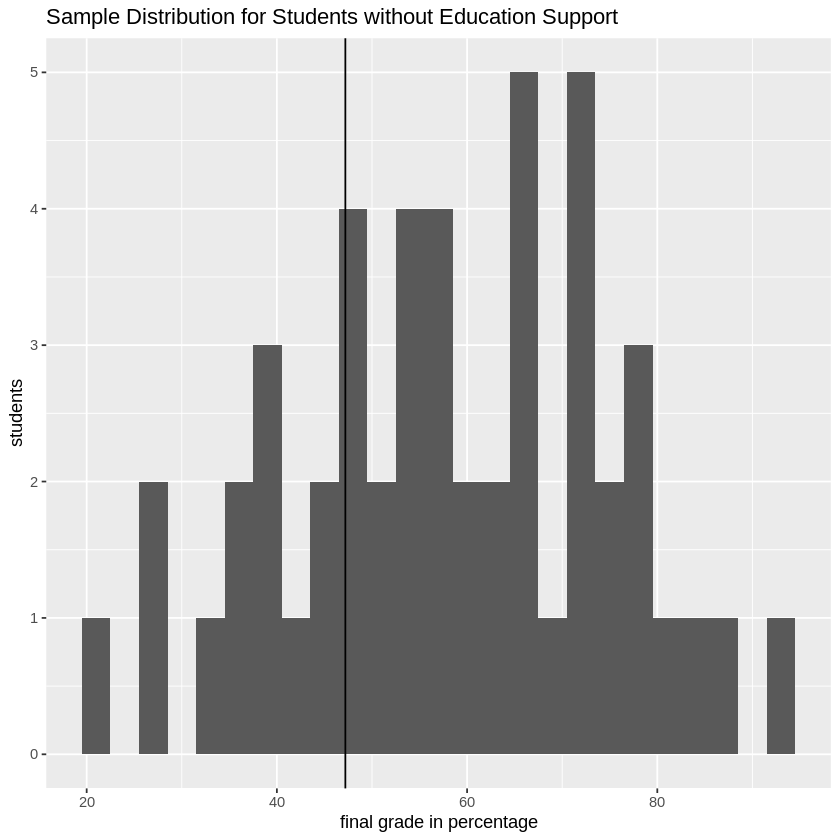

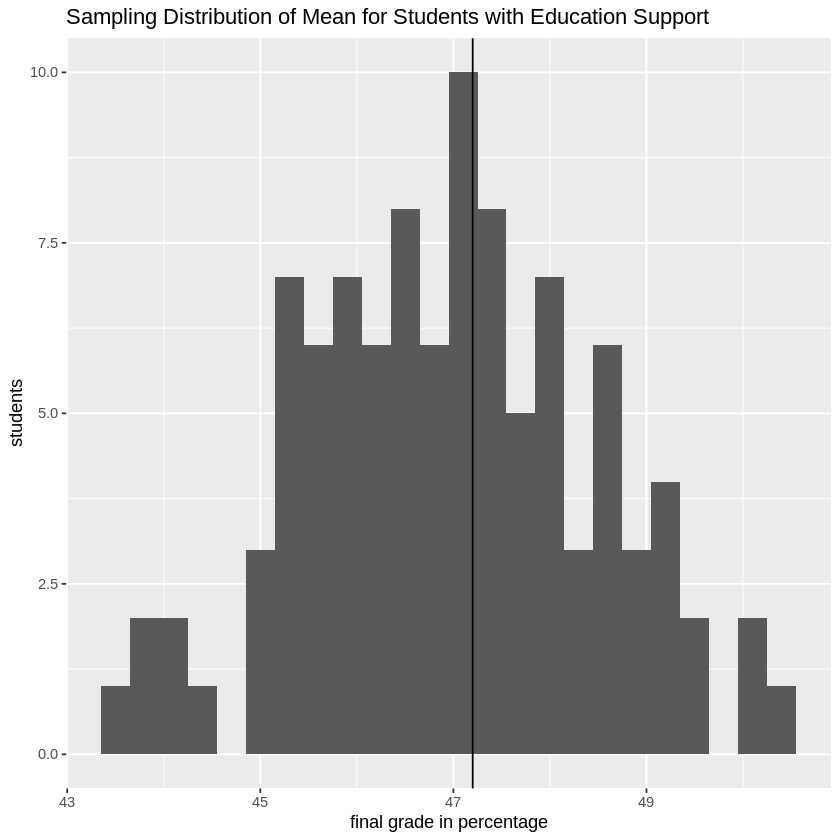

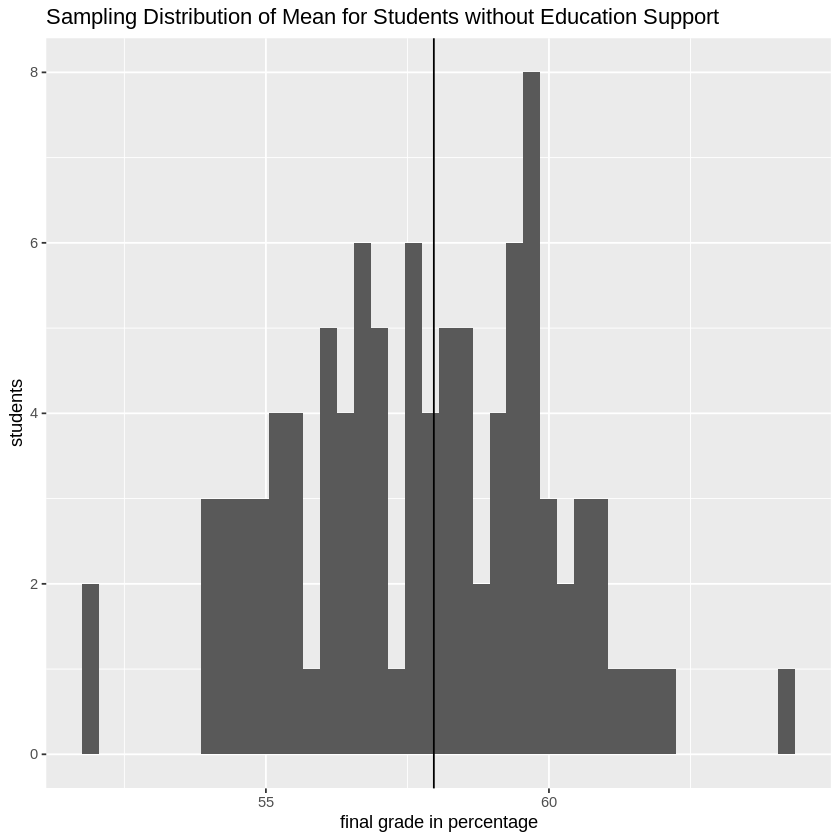

In [72]:
#Use the entire data to perform sampling
#first split the data into with edu support & without edu support
students_with_support <- student_data_clean %>%
                         filter(extra_edu_support == "yes")
#A TA said that best to keep samples with the same data size so trim down the sample size for students_without_support
students_without_support <- student_data_clean %>%
                           filter(extra_edu_support == "no") %>%
                           rep_sample_n(reps = 1, size = nrow(students_with_support), replace = FALSE) 
#sample estimates:
mean_final_with_support <- students_with_support %>%
                           summarize(mean = mean(final_grade_by_percent)) %>%
                           pull(mean) %>%
                           as.numeric()
median_final_with_support <- students_with_support %>%
                             summarize(median = median(final_grade_by_percent)) %>%
                             pull(median) %>%
                             as.numeric()
sd_final_with_support <- students_with_support %>%
                         summarize(sd = sd(final_grade_by_percent)) %>%
                         pull(sd) %>%
                         as.numeric()

mean_final_without_support <- students_without_support %>%
                              summarize(mean = mean(final_grade_by_percent)) %>%
                              pull(mean) %>%
                              as.numeric()
median_final_without_support <- students_without_support %>%
                             summarize(median = median(final_grade_by_percent)) %>%
                             pull(median) %>%
                             as.numeric()
sd_final_without_support <- students_without_support %>%
                            summarize(sd = sd(final_grade_by_percent)) %>%
                            pull(sd) %>%
                            as.numeric()
#construct a table for sample estimates of population parameters:
sample_estimates_table <- data.frame(samples = c("students_with_support", "students_without_support"),
                          mean = c(mean_final_with_support, mean_final_without_support),
                          median = c(median_final_with_support, mean_final_without_support),
                          standard_deviation = c(sd_final_with_support, sd_final_without_support))
sample_estimates_table
#sample distribution:
student_with_support_plot <-  students_with_support %>%
                              ggplot(aes(x = final_grade_by_percent)) +
                              geom_histogram(binwidth = 3) +
                              geom_vline(xintercept = mean_final_with_support) +
                              xlab("final grade in percentage") +
                              ylab("students") +
                              ggtitle("Sample Distribution for Students with Education Support")
student_with_support_plot

student_without_support_plot <-  students_without_support %>%
                              ggplot(aes(x = final_grade_by_percent)) +
                              geom_histogram(binwidth = 3) +
                              geom_vline(xintercept = mean_final_with_support) +
                              xlab("final grade in percentage") +
                              ylab("students") +
                              ggtitle("Sample Distribution for Students without Education Support")
student_without_support_plot
## very little difference from the sample distribution

#bootstrapping & bootstrap sampling distribution:
#n here refers to the number of bootstrap samples we will take from the sample
n = 100
#bootstrap sampling distribution for students with edu support

students_with_support_bootstrap_sample <- students_with_support %>%
                                          rep_sample_n(reps = n, size = nrow(students_with_support), replace = TRUE) %>%
                                          group_by(replicate) %>%
                                          summarize(mean = mean(final_grade_by_percent))

students_with_support_boostraping_sampling_distribution_plot <- students_with_support_bootstrap_sample %>%
                                                                ggplot(aes(x = mean)) +
                                                                geom_histogram(binwidth = 0.3) +
                                                                geom_vline(xintercept = mean_final_with_support) +
                                                                xlab("final grade in percentage") +
                                                                ylab("students") +
                                                                ggtitle("Sampling Distribution of Mean for Students with Education Support")
students_with_support_boostraping_sampling_distribution_plot

students_without_support_bootstrap_sample <- students_without_support %>%
                                          rep_sample_n(reps = n, size = nrow(students_with_support), replace = TRUE) %>%
                                          group_by(replicate) %>%
                                          summarize(mean = mean(final_grade_by_percent))

students_without_support_boostraping_sampling_distribution_plot <- students_without_support_bootstrap_sample %>%
                                                                ggplot(aes(x = mean)) +
                                                                geom_histogram(binwidth = 0.3) +
                                                                geom_vline(xintercept = mean_final_without_support) +
                                                                xlab("final grade in percentage") +
                                                                ylab("students") +
                                                                ggtitle("Sampling Distribution of Mean for Students without Education Support")
students_without_support_boostraping_sampling_distribution_plot
                                                            

